# Descrição da Atividade

Criação de uma rede neural, podendo escolher entre **TensorFlow** ou **PyTorch**.

## Algumas questões que foram passadas:

# Atividade Obrigatória

1. Criar uma rede neural de classificação entre **galáxias, quasares e estrelas** usando **TensorFlow** ou **PyTorch**.
2. Testar o efeito de se variar a **largura** e a **profundidade** da rede neural.
3. Treinar o modelo testando diferentes valores de **épocas** e **learning rate**, identificando quando ocorre **overfitting** ou **underfitting**.
4. Testar o efeito da **regularização** e de outros métodos de **otimização**.

# Atividades Sugeridas

1. Aplicar as técnicas em outro conjunto de dados, como os que podem ser importados diretamente para o notebook através do **Keras**.
2. Criar uma rede neural **"from scratch"** (do zero) de classificação e aplicá-la no dataset. Use como embasamento a playlist **"Neural Networks from Scratch in Python"**:
   - A rede deve conter **uma camada oculta** (quantidade de neurônios a critério).
   - Separar a **label** das **features** e dividir o dataset em **subconjuntos de treinamento e teste**.
   - Fazer a **inicialização randômica dos pesos**.
   - Definir a **função de ativação** e calcular sua **derivada** (sinta-se à vontade para experimentar mais de uma).
   - Treinar o modelo testando diferentes valores de **épocas** e **learning rate**, identificando quando ocorre **overfitting** e **underfitting**.
   - Fazer as **previsões nos dados de teste** e **avaliar o modelo**.

---

# Sobre o Dataset

Na astronomia, a **classificação estelar** é a classificação das estrelas com base em suas **características espectrais**. O esquema de classificação de **galáxias, quasares e estrelas** é um dos mais fundamentais na astronomia.

A catalogação inicial das estrelas e sua distribuição no céu levou à compreensão de que elas formam a nossa própria galáxia e, após a distinção de que **Andrômeda** era uma galáxia separada da nossa, inúmeras galáxias começaram a ser catalogadas à medida que telescópios mais potentes foram construídos.

Este conjunto de dados tem como objetivo **classificar estrelas, galáxias e quasares com base em suas características espectrais.**

## Descrição dos Atributos

- **obj_ID**: Identificador do objeto, valor único que identifica o objeto no catálogo de imagens usado pelo CAS.
- **alpha**: Ângulo de Ascensão Reta (época J2000).
- **delta**: Ângulo de Declinação (época J2000).
- **u**: Filtro ultravioleta no sistema fotométrico.
- **g**: Filtro verde no sistema fotométrico.
- **r**: Filtro vermelho no sistema fotométrico.
- **i**: Filtro infravermelho próximo no sistema fotométrico.
- **z**: Filtro infravermelho no sistema fotométrico.
- **run_ID**: Número da execução usado para identificar a varredura específica.
- **rerun_ID**: Número de reprocessamento que especifica como a imagem foi processada.
- **cam_col**: Coluna da câmera que identifica a linha de varredura dentro da execução.
- **field_ID**: Número do campo para identificar cada campo.
- **spec_obj_ID**: ID único usado para objetos espectroscópicos ópticos (isto significa que duas observações diferentes com o mesmo spec_obj_ID devem compartilhar a mesma classe de saída).
- **class**: Classe do objeto (**galáxia**, **estrela** ou **quasar**).
- **redshift**: Valor de redshift baseado no aumento do comprimento de onda.
- **plate**: ID da placa, que identifica cada placa no SDSS.
- **MJD**: Data Juliana Modificada, usada para indicar quando um determinado dado do SDSS foi obtido.
- **fiber_ID**: ID da fibra que identifica a fibra que captou a luz no plano focal em cada observação.

  [Link para o dataset no Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import torch
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
dataframe = pd.read_csv('star_classification.csv')
dataframe.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [69]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [70]:
dataframe.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [71]:
galaxy = dataframe[dataframe["class"] == "GALAXY"].drop(columns=["obj_ID", "class" , "run_ID" , "field_ID" , "rerun_ID" , "fiber_ID" , "spec_obj_ID"])
star =  dataframe[dataframe["class"] == "STAR"].drop(columns=["obj_ID", "class" , "run_ID" , "field_ID" , "rerun_ID" , "fiber_ID" , "spec_obj_ID"])
qso  = dataframe[dataframe["class"] == "QSO"].drop(columns=["obj_ID", "class" , "run_ID" , "field_ID" , "rerun_ID" , "fiber_ID" , "spec_obj_ID"])

In [72]:
display(galaxy.describe(), star.describe(), qso.describe())

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000
mean,177.954727,23.513911,22.587379,20.906101,19.587552,18.851990,18.449156,3.484650,0.421596,4869.375608,55423.463605
std,94.403760,19.315205,2.264355,2.107755,1.874133,1.689809,1.656302,1.574524,0.264858,2858.332435,1806.053472
min,0.005528,-12.364701,13.897990,12.679020,11.746640,11.299560,10.897380,1.000000,-0.009971,266.000000,51608.000000
25%,131.506951,5.167016,20.794760,18.912680,17.817150,17.379670,17.095670,2.000000,0.164527,2172.000000,53845.000000
50%,181.315787,22.301731,22.841770,21.582200,20.104590,19.223660,18.766630,4.000000,0.456274,4770.000000,55830.000000
75%,231.333266,37.972697,24.207410,22.445130,20.974610,19.947090,19.472260,5.000000,0.594699,6792.000000,56543.000000
max,359.994125,77.615588,29.325650,31.602240,29.571860,30.163590,29.383740,6.000000,1.995524,12547.000000,58932.000000


,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000
mean,174.234485,23.498554,20.689805,19.153188,18.946969,18.543736,17.870400,3.576271,-0.000115,4287.920348,55131.149115
std,99.876175,20.383288,68.228825,68.210460,1.972786,1.841714,68.193708,1.628102,0.000465,2691.789973,1656.266867
min,0.029838,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,-0.004136,267.000000,51608.000000
25%,114.863064,3.127855,19.327275,18.034847,17.454012,17.139703,16.963810,2.000000,-0.000295,2318.000000,53905.000000
50%,174.151671,23.400565,21.010555,19.542825,18.955080,18.592360,18.319225,4.000000,-0.000076,3296.000000,54924.000000
75%,240.850550,39.939705,22.960617,21.228690,20.557477,20.041690,19.729615,5.000000,0.000075,6386.000000,56365.000000
max,359.999810,83.000519,30.660390,30.607000,29.374110,30.250090,26.427790,6.000000,0.004153,12547.000000,58932.000000


,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,180.474314,26.808621,21.547619,20.926193,20.624089,20.431173,20.266732,3.522494,1.719676,6943.071621,56627.547176
std,98.962348,19.588410,1.495879,1.163239,1.084237,1.080135,1.095076,1.575871,0.913954,2792.093167,1579.823334
min,0.010959,-15.980904,10.996230,13.662170,12.357630,12.637440,11.302470,1.000000,0.000461,267.000000,51608.000000
25%,129.133119,7.427090,20.637640,20.249730,20.006330,19.811070,19.644250,2.000000,1.106605,5005.000000,55868.000000
50%,183.682504,29.299167,21.503240,21.056290,20.772720,20.582110,20.373970,3.000000,1.617232,7574.000000,56955.000000
75%,235.864774,42.886953,22.286470,21.687770,21.413450,21.202280,21.001230,5.000000,2.220279,8746.000000,57870.000000
max,359.999615,82.288657,32.781390,27.894820,27.397090,32.141470,28.790550,6.000000,7.011245,12547.000000,58932.000000


In [73]:
columns = ["u" , "g" , "r"  , "z" , "redshift" ]
display(galaxy[columns].describe() , star[columns].describe() , qso[columns].describe())

,u,g,r,z,redshift
count,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000
mean,22.587379,20.906101,19.587552,18.449156,0.421596
std,2.264355,2.107755,1.874133,1.656302,0.264858
min,13.897990,12.679020,11.746640,10.897380,-0.009971
25%,20.794760,18.912680,17.817150,17.095670,0.164527
50%,22.841770,21.582200,20.104590,18.766630,0.456274
75%,24.207410,22.445130,20.974610,19.472260,0.594699
max,29.325650,31.602240,29.571860,29.383740,1.995524


,u,g,r,z,redshift
count,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000
mean,20.689805,19.153188,18.946969,17.870400,-0.000115
std,68.228825,68.210460,1.972786,68.193708,0.000465
min,-9999.000000,-9999.000000,9.822070,-9999.000000,-0.004136
25%,19.327275,18.034847,17.454012,16.963810,-0.000295
50%,21.010555,19.542825,18.955080,18.319225,-0.000076
75%,22.960617,21.228690,20.557477,19.729615,0.000075
max,30.660390,30.607000,29.374110,26.427790,0.004153


,u,g,r,z,redshift
count,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,21.547619,20.926193,20.624089,20.266732,1.719676
std,1.495879,1.163239,1.084237,1.095076,0.913954
min,10.996230,13.662170,12.357630,11.302470,0.000461
25%,20.637640,20.249730,20.006330,19.644250,1.106605
50%,21.503240,21.056290,20.772720,20.373970,1.617232
75%,22.286470,21.687770,21.413450,21.001230,2.220279
max,32.781390,27.894820,27.397090,28.790550,7.011245


In [74]:
display(galaxy[columns].quantile() , star[columns].quantile() , qso[columns].quantile())

,0.5
u,22.841770
g,21.582200
r,20.104590
z,18.766630
redshift,0.456274


,0.5
u,21.010555
g,19.542825
r,18.955080
z,18.319225
redshift,-0.000076


,0.5
u,21.503240
g,21.056290
r,20.772720
z,20.373970
redshift,1.617232


## Análise Exploratória

Temos três classes no nosso conjunto de dados: **Galaxy**, **Star** e **QSO**.

Meu primeiro objetivo é **identificar padrões e entender o comportamento das classes**.

As colunas selecionadas para essa análise são: **`u`**, **`g`**, **`r`**, **`z`** e **`redshift`**.

### Primeira hipótese

Quando o valor de **`redshift`** é **alto**, existe uma maior probabilidade do objeto ser uma **QSO (Quasar)** ou uma **galáxia**.

Por outro lado, quando o valor de **`redshift`** é **menor que 1**, há maior probabilidade do objeto ser uma **estrela**, já que objetos estelares estão mais próximos e, portanto, possuem um redshift mais baixo.


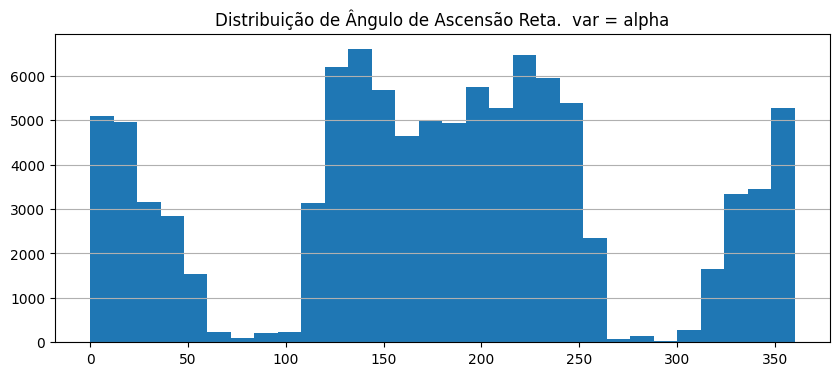

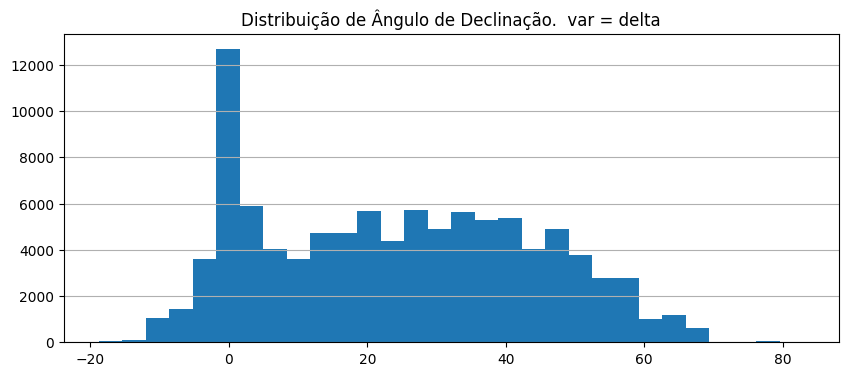

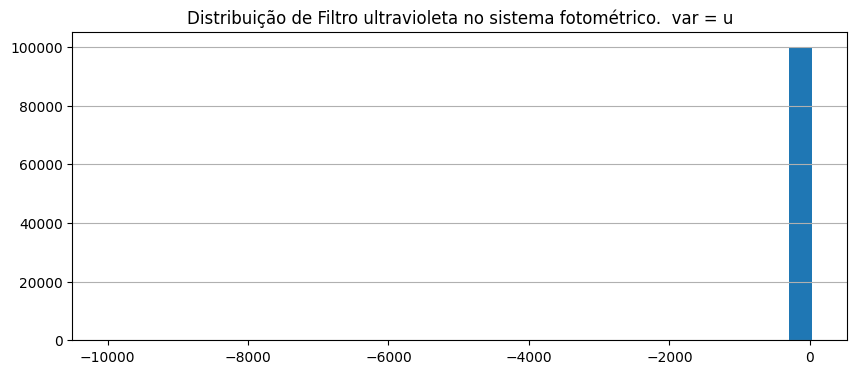

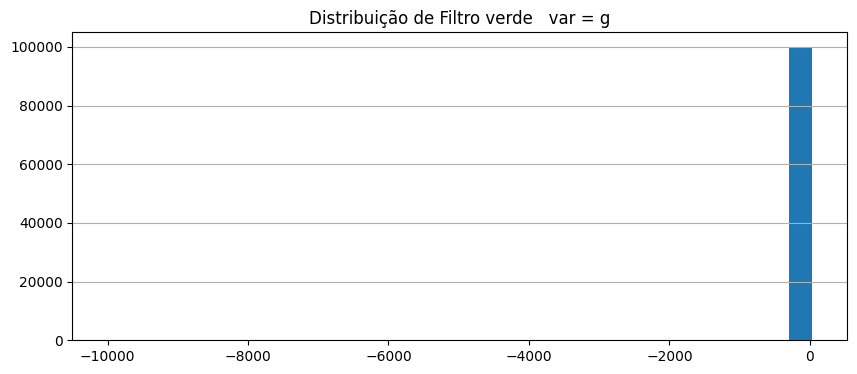

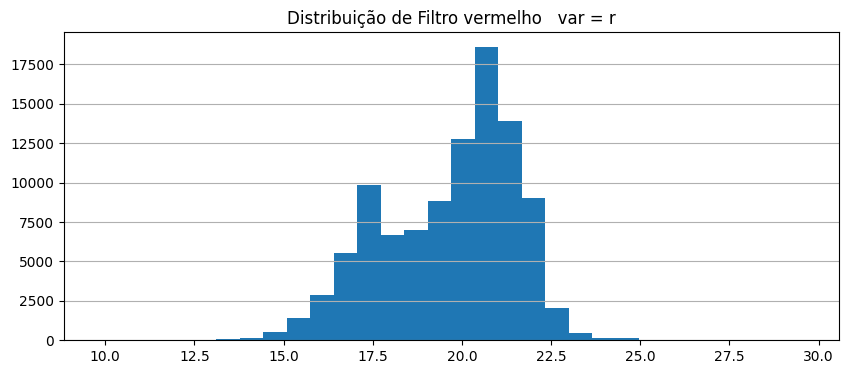

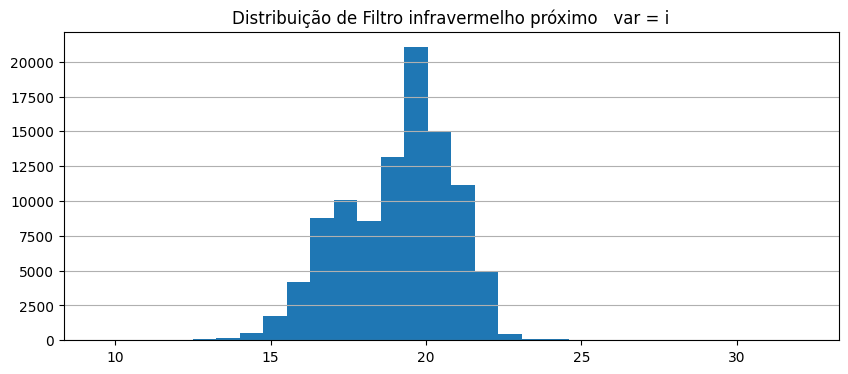

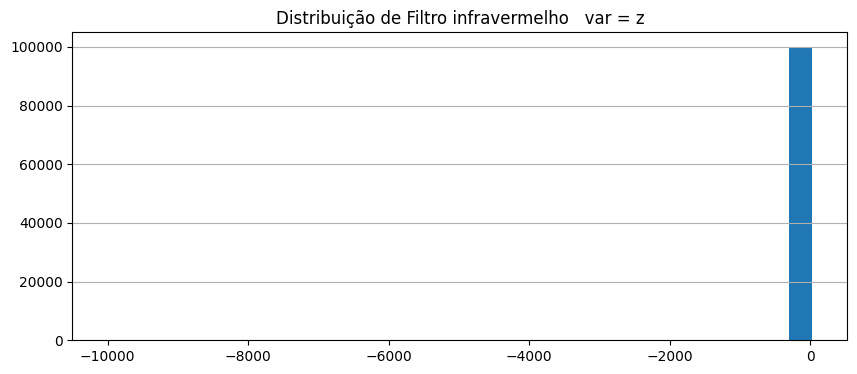

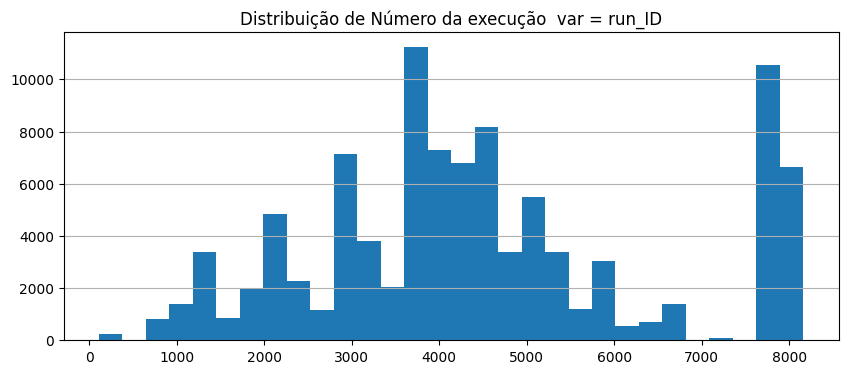

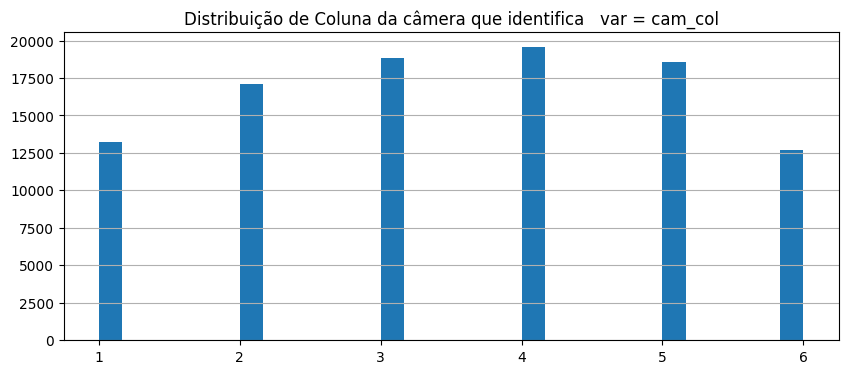

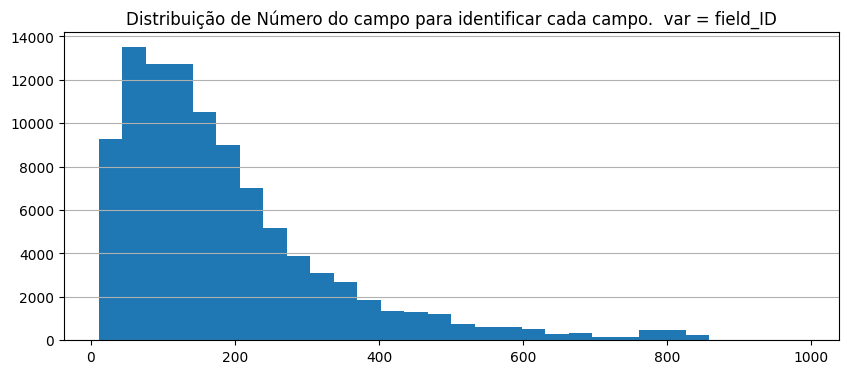

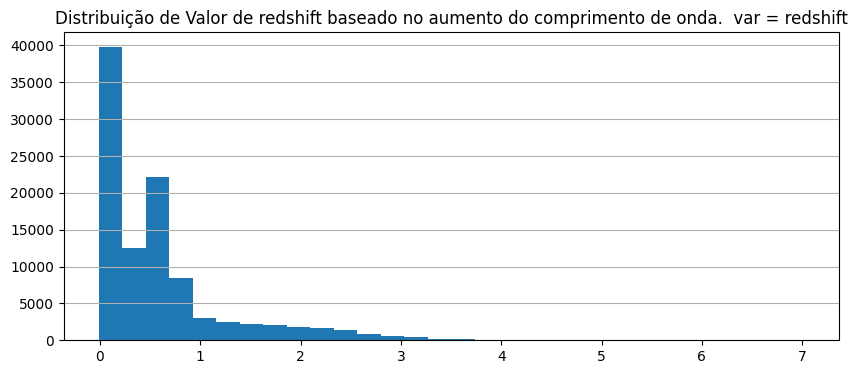

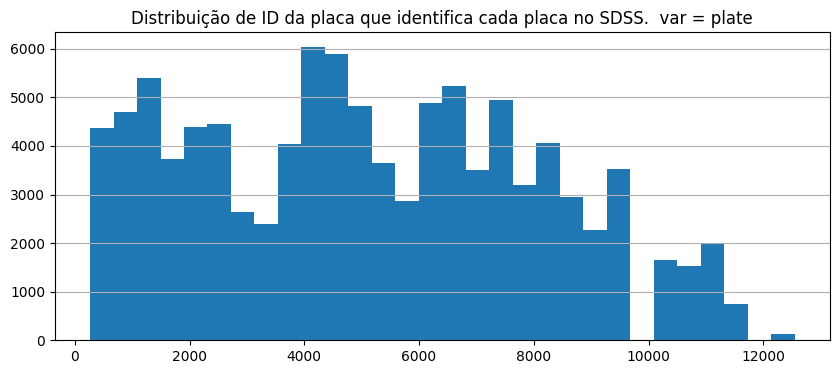

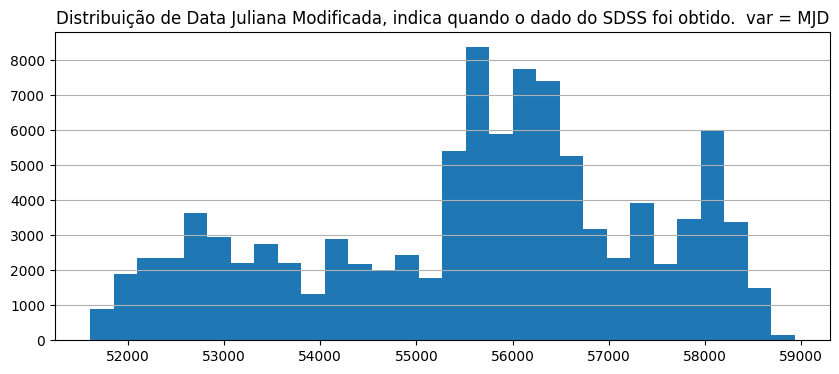

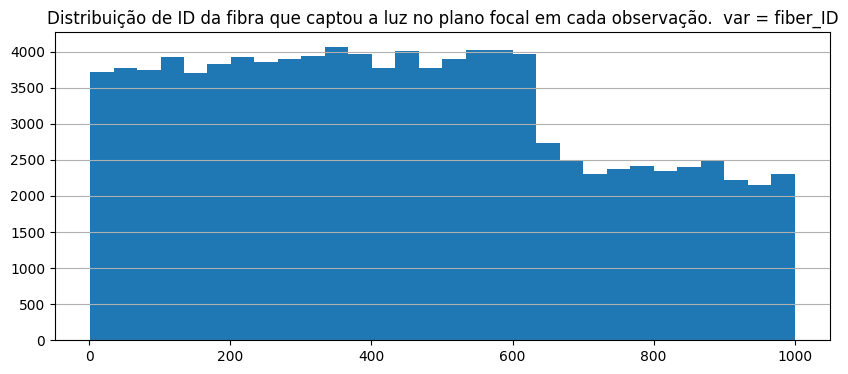

In [75]:
numerics = dataframe.select_dtypes(include="number")
columns = numerics.drop(columns=["obj_ID" , "spec_obj_ID" , "rerun_ID"]).columns
descricao_variaveis = {
    "alpha": "Ângulo de Ascensão Reta.",
    "delta": "Ângulo de Declinação.",
    "u": "Filtro ultravioleta no sistema fotométrico.",
    "g": "Filtro verde ",
    "r": "Filtro vermelho ",
    "i": "Filtro infravermelho próximo ",
    "z": "Filtro infravermelho ",
    "run_ID": "Número da execução",
    "cam_col": "Coluna da câmera que identifica ",
    "field_ID": "Número do campo para identificar cada campo.",
    "class": "Classe do objeto (galáxia, estrela ou quasar).",
    "redshift": "Valor de redshift baseado no aumento do comprimento de onda.",
    "plate": "ID da placa que identifica cada placa no SDSS.",
    "MJD": "Data Juliana Modificada, indica quando o dado do SDSS foi obtido.",
    "fiber_ID": "ID da fibra que captou a luz no plano focal em cada observação."
}
for column in columns:
    plt.figure(figsize=(10, 4))
    dataframe[column].hist(bins=30)
    plt.title(f"Distribuição de {descricao_variaveis[column]}  var = {column}")
    plt.grid(axis="x")
    plt.show()

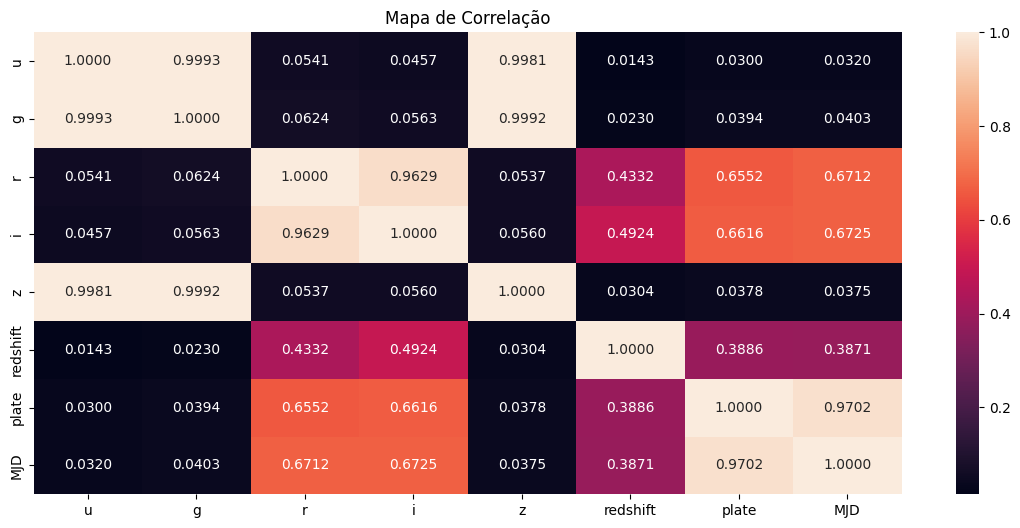

In [76]:
dataframe_corr = dataframe[columns].drop(columns=["alpha", "delta" , "run_ID" , "cam_col" , "field_ID" , "fiber_ID"])
plt.figure(figsize=(14, 6))
sns.heatmap(dataframe_corr.corr(), fmt=".4f", annot=True)
plt.title("Mapa de Correlação")
plt.show()

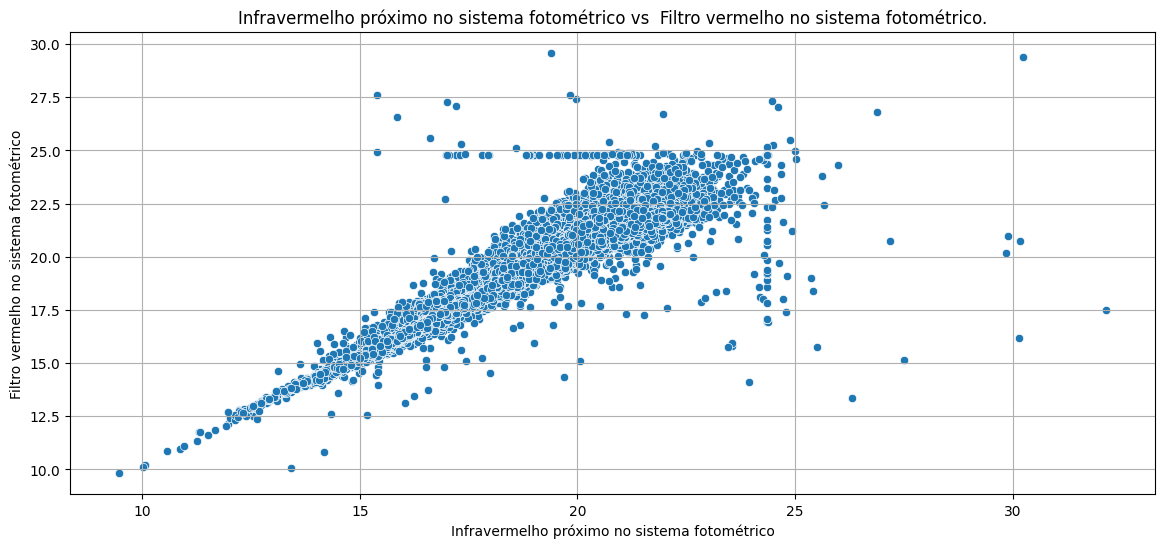

In [77]:
plt.figure(figsize=(14, 6))
sns.scatterplot( x=dataframe["i"] , y=dataframe["r"] )
plt.title("Infravermelho próximo no sistema fotométrico vs  Filtro vermelho no sistema fotométrico.")
plt.xlabel("Infravermelho próximo no sistema fotométrico")
plt.ylabel("Filtro vermelho no sistema fotométrico")
plt.grid()
plt.show()

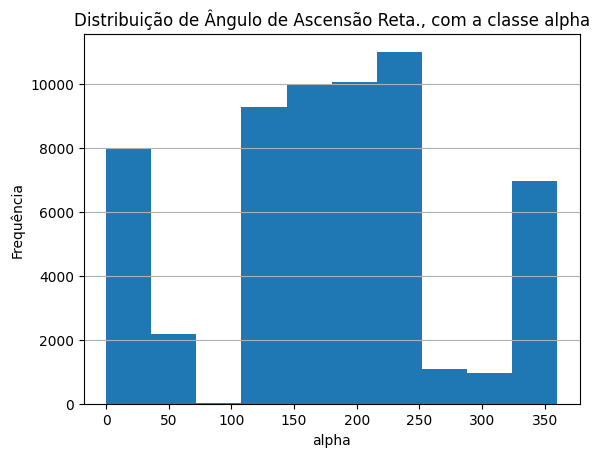

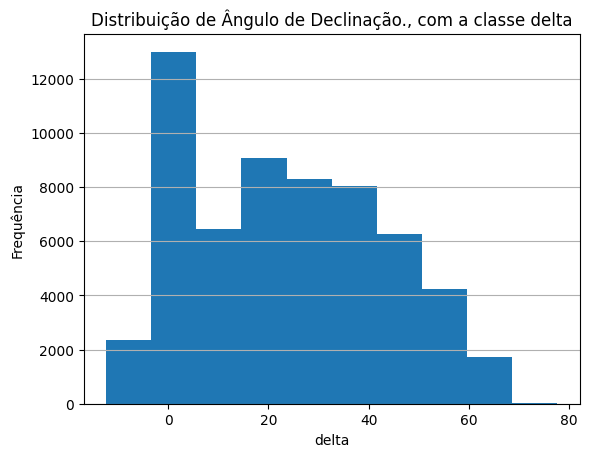

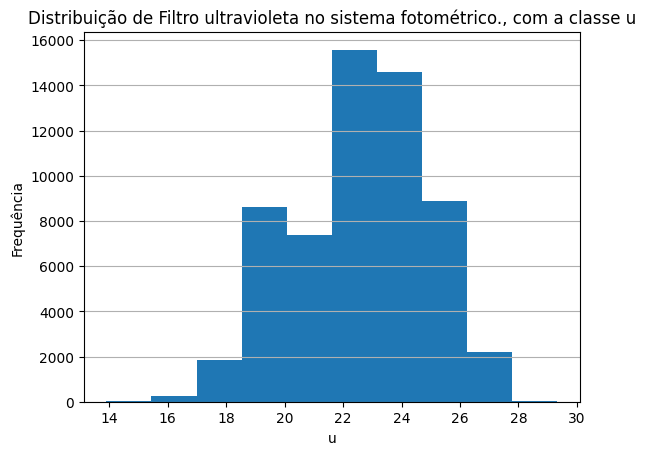

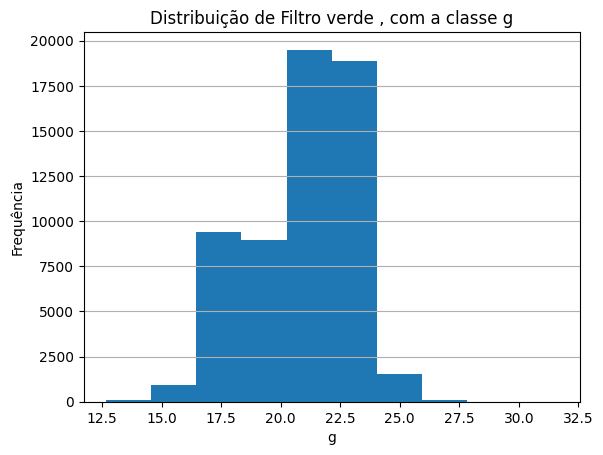

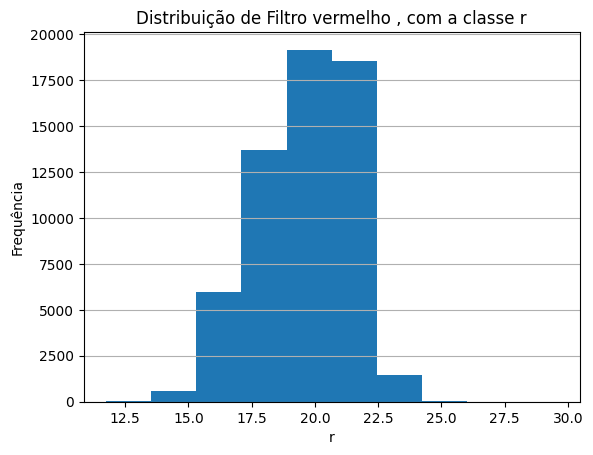

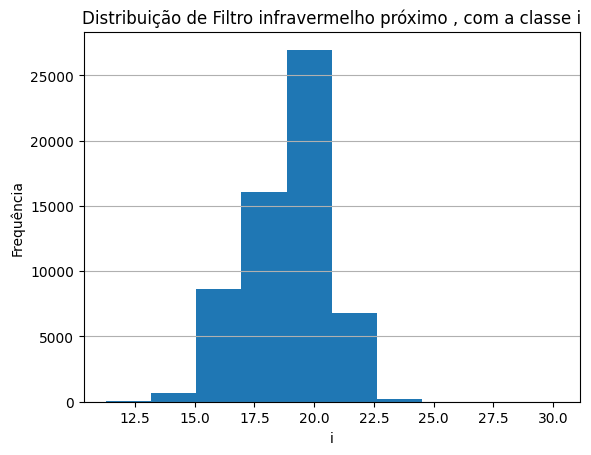

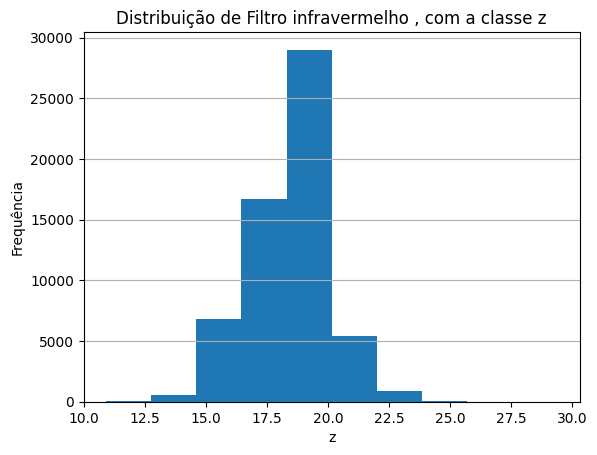

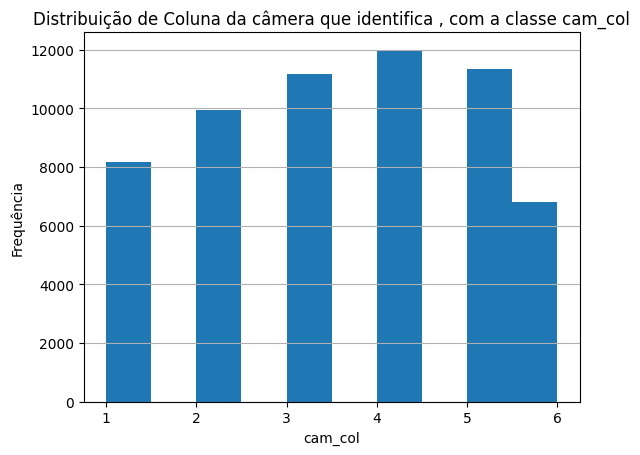

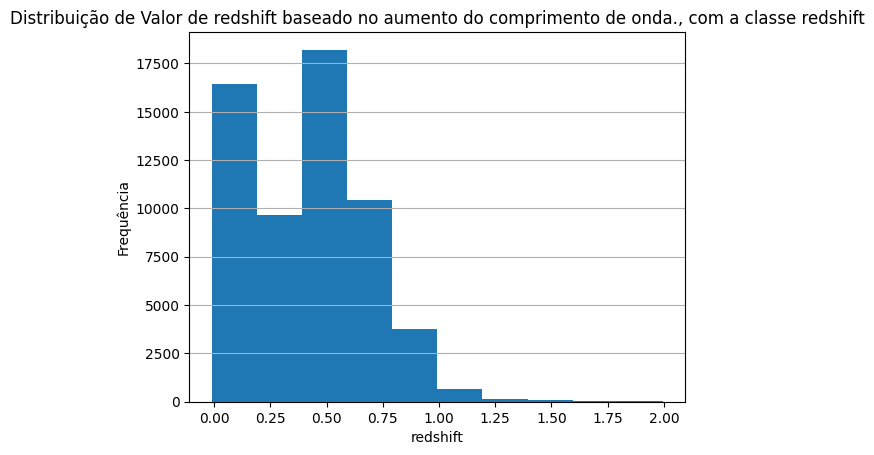

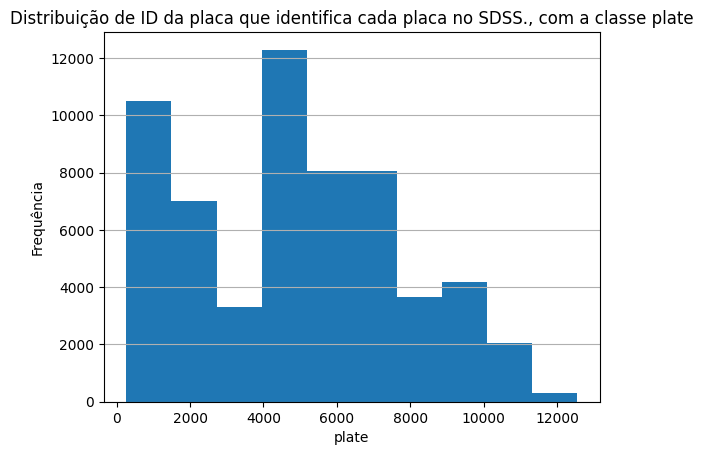

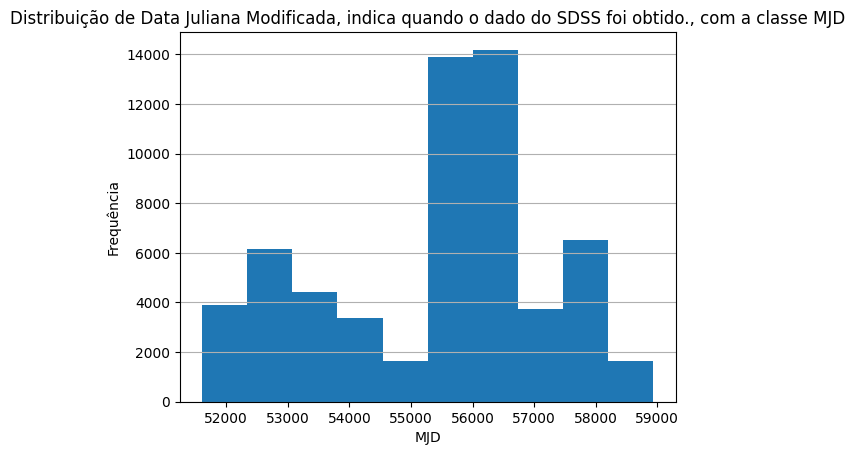

In [78]:
columns = galaxy.columns
for column in columns:
  plt.hist(galaxy[column])
  plt.title(f"Distribuição de {descricao_variaveis[column]}, com a classe {column}")
  plt.xlabel(column)
  plt.ylabel("Frequência")
  plt.grid(axis="y")
  plt.show()
  print()

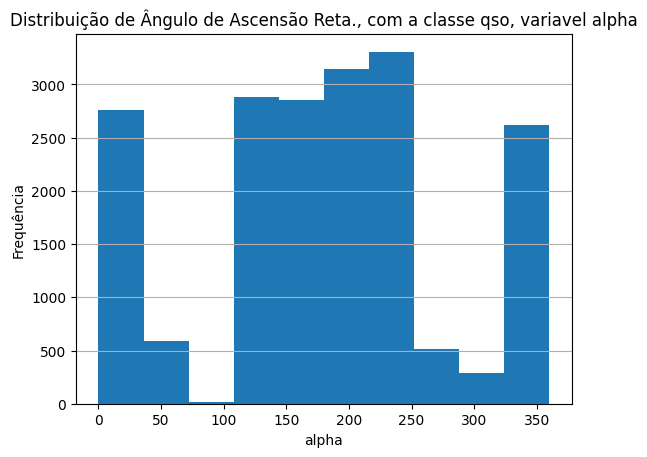

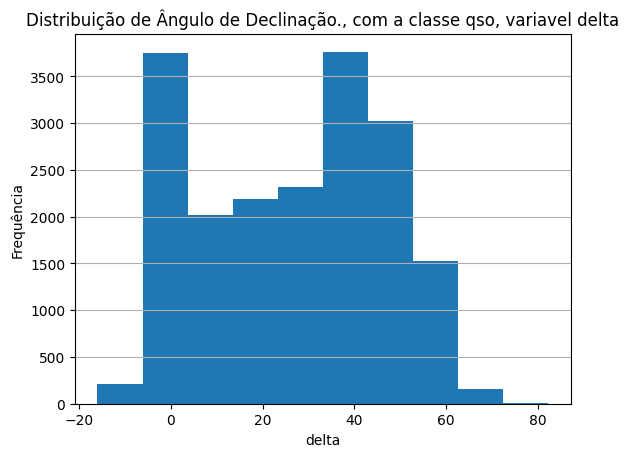

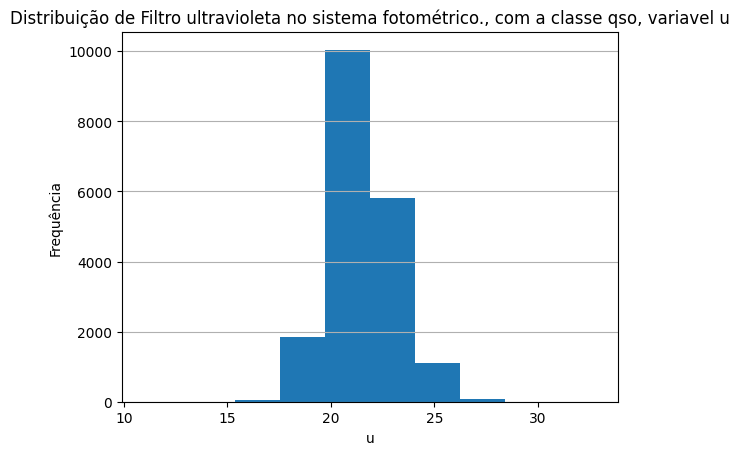

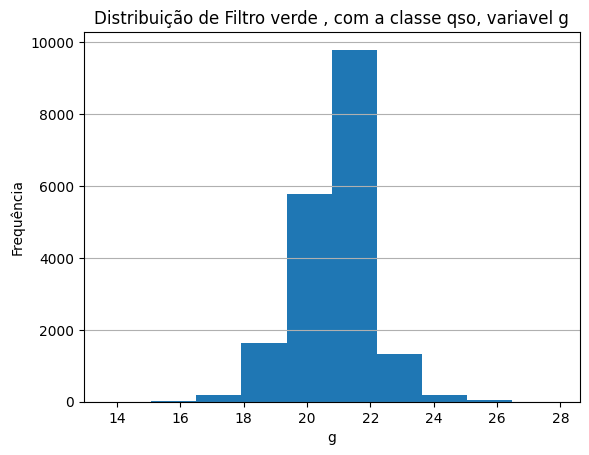

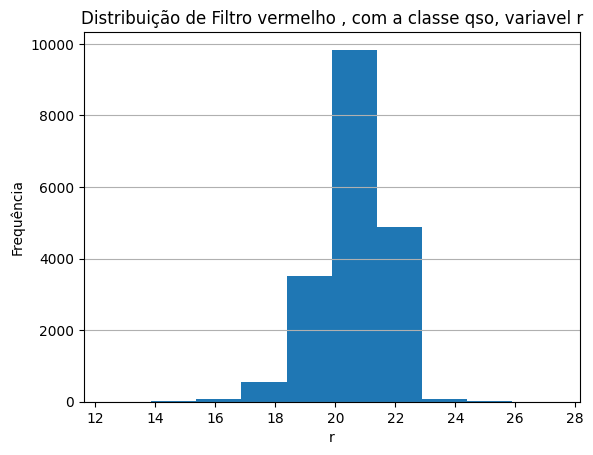

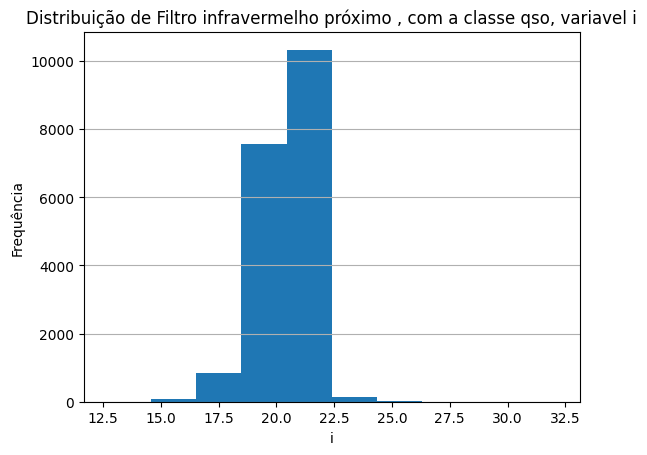

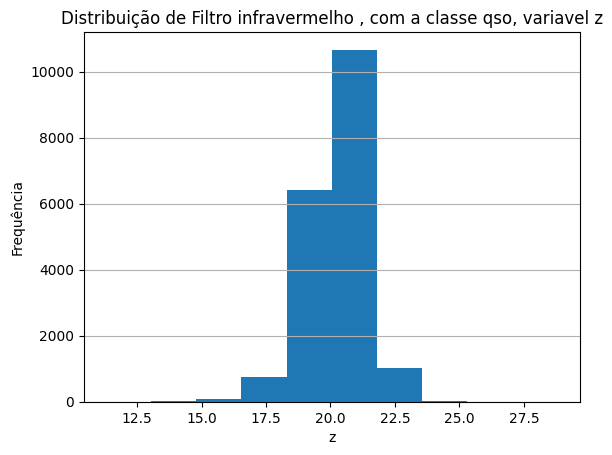

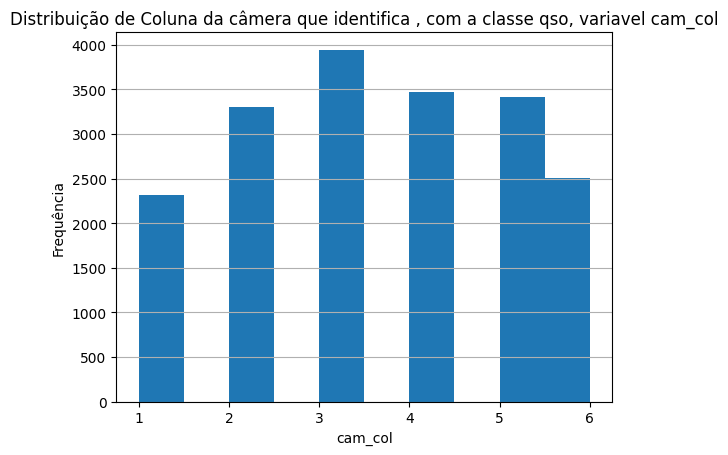

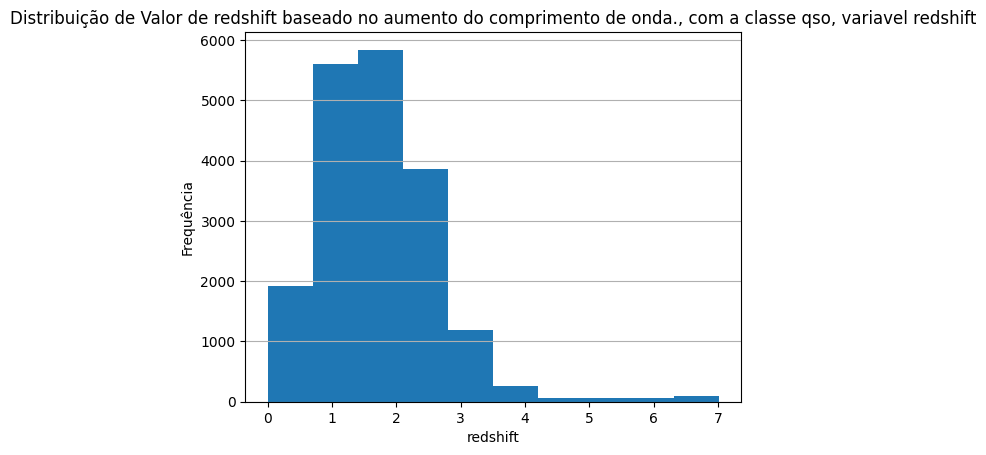

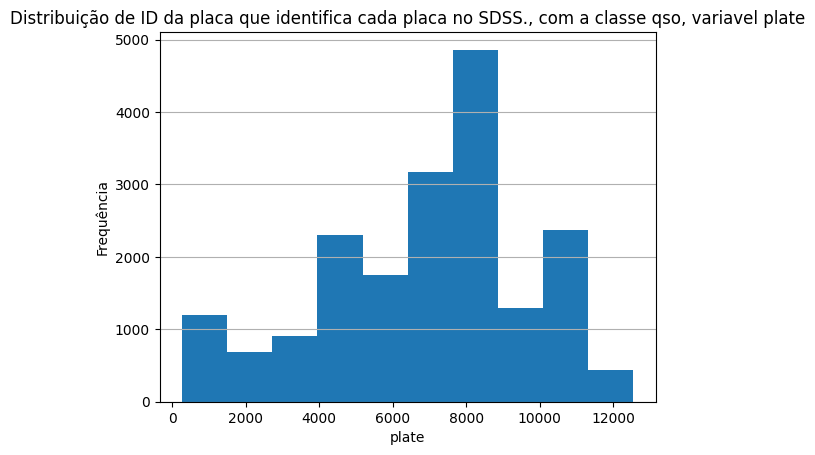

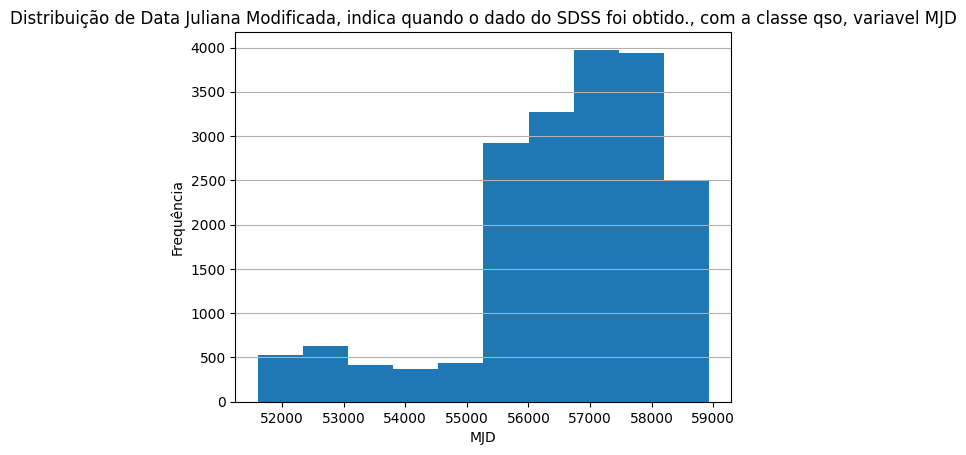

In [79]:
columns = qso.columns
for column in columns:
  plt.hist(qso[column])
  plt.title(f"Distribuição de {descricao_variaveis[column]}, com a classe qso, variavel {column}")
  plt.xlabel(column)
  plt.ylabel("Frequência")
  plt.grid(axis="y")
  plt.show()
  print()

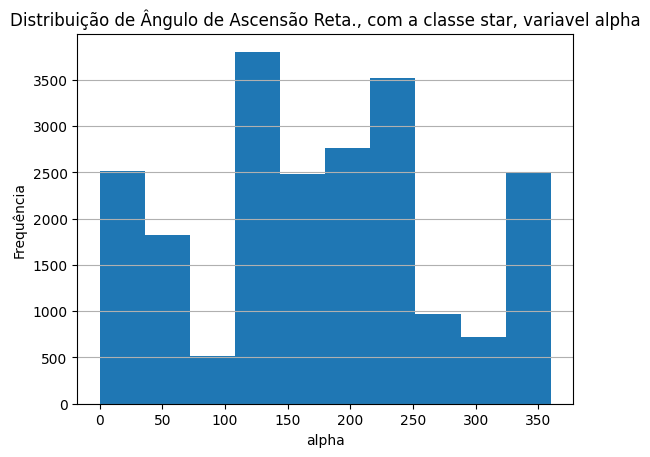

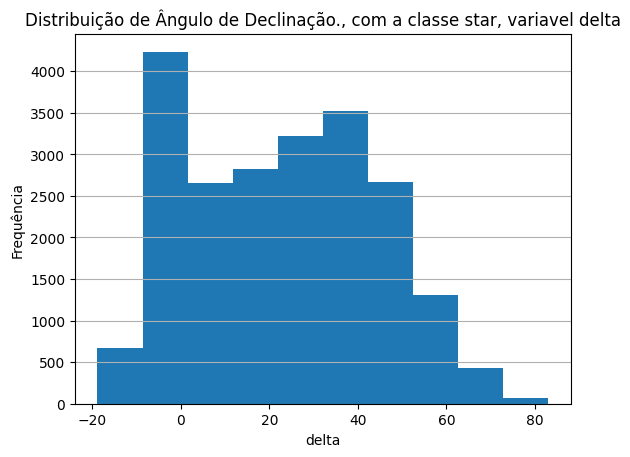

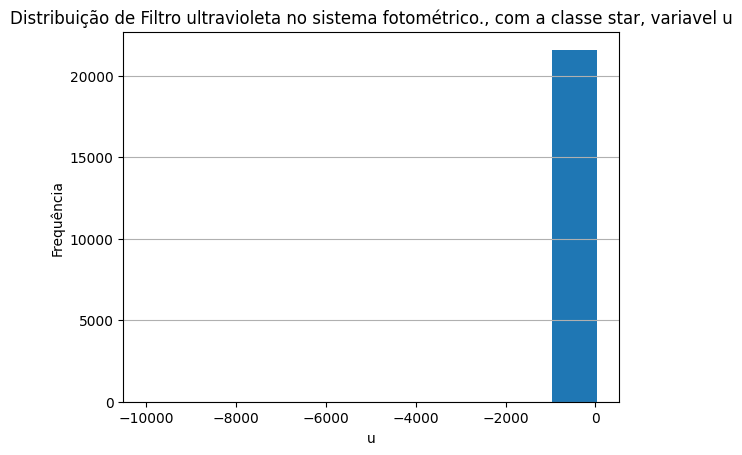

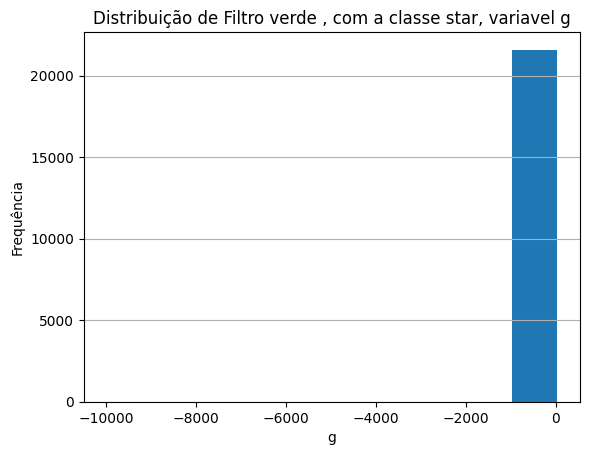

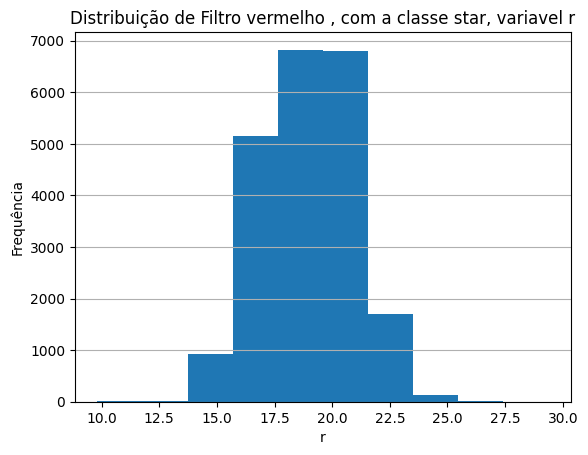

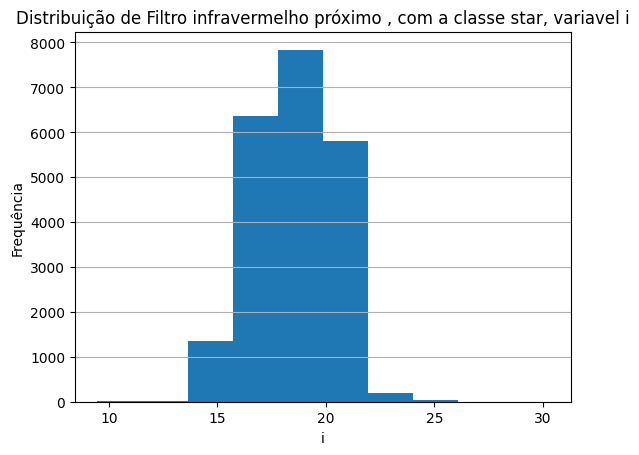

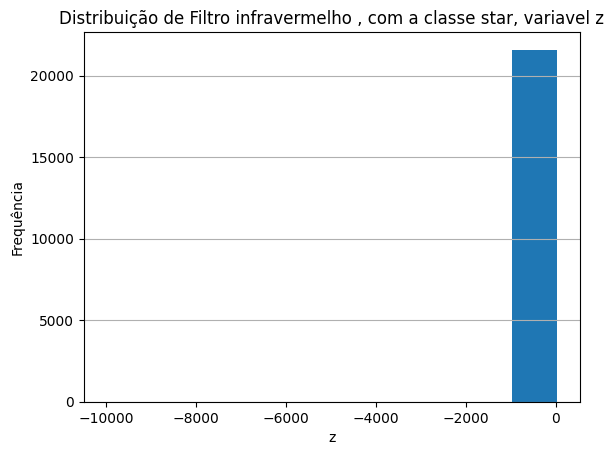

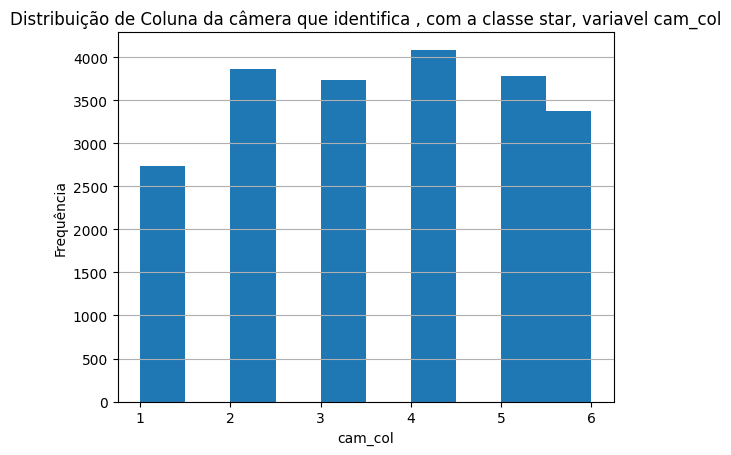

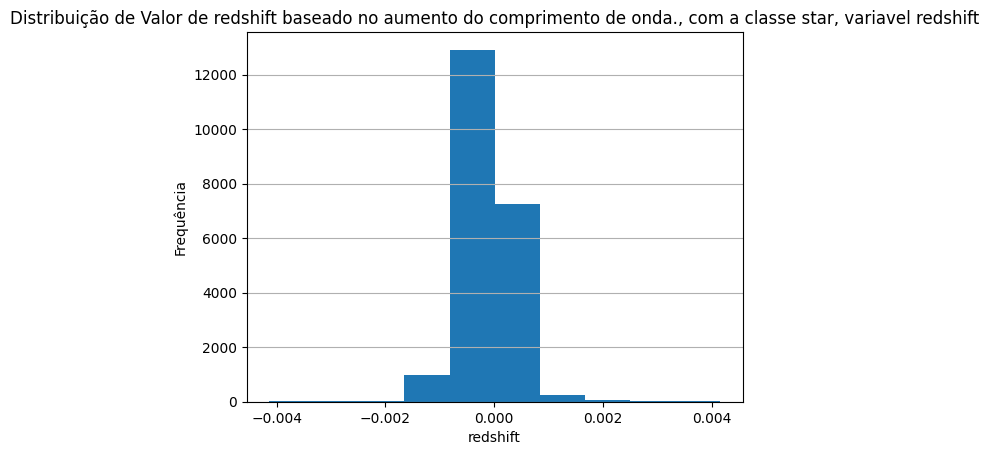

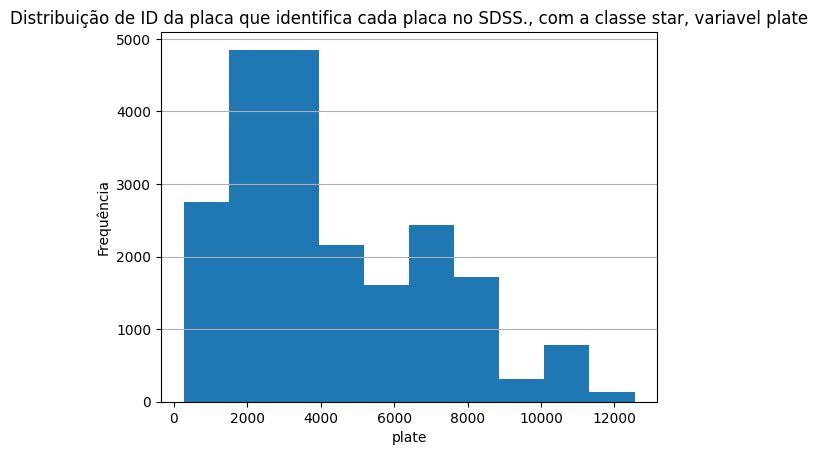

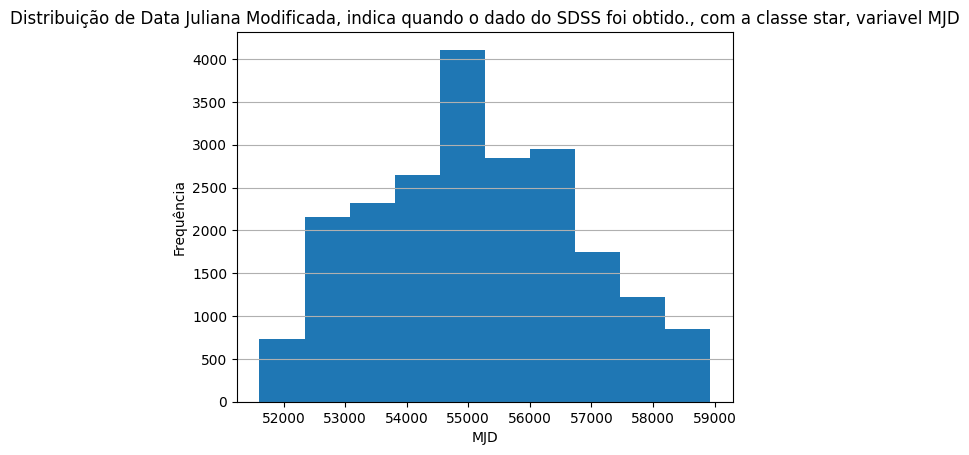

In [80]:
columns = star.columns
for column in columns:
  plt.hist(star[column])
  plt.title(f"Distribuição de {descricao_variaveis[column]}, com a classe star, variavel {column}")
  plt.xlabel(column)
  plt.ylabel("Frequência")
  plt.grid(axis="y")
  plt.show()
  print()

In [81]:
qso.shape , galaxy.shape , star.shape

((18961, 11), (59445, 11), (21594, 11))

### Começando a rede neural (usando o tensorflow)

1 - preparando os dados, eliminandos colunas <br>
labels: ['GALAXY' 'QSO' 'STAR']<br>
GALAXY: 0<br>
QSO: 1<br>
STAR: 2<br>

In [82]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [83]:
dataframe_train = dataframe.drop(columns=["obj_ID" , "run_ID" , "field_ID" , "rerun_ID" , "fiber_ID" , "spec_obj_ID" ])

In [84]:
features = dataframe_train.drop(columns="class" )
target = dataframe_train["class"]

In [85]:
encoder = LabelEncoder()
target_enconder = encoder.fit_transform(target)

In [86]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



In [87]:
X_train , X_test , y_train , y_test = sklearn.model_selection.train_test_split(features_scaled , target_enconder , test_size=0.2 , random_state=42)

In [88]:
model = keras.Sequential(
  [
        layers.Dense(16 , activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(8 , activation='relu'),
        layers.Dense(8 , activation='relu'),
        layers.Dense(3 , activation='softmax')
  ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427 (1.67 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
hist = model.fit(
    X_train,y_train,
    epochs=100,
    validation_split=0.2
)


Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7537 - loss: 0.5843 - val_accuracy: 0.9421 - val_loss: 0.1879
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9496 - loss: 0.1628 - val_accuracy: 0.9541 - val_loss: 0.1498
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9574 - loss: 0.1370 - val_accuracy: 0.9588 - val_loss: 0.1419
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9603 - loss: 0.1308 - val_accuracy: 0.9609 - val_loss: 0.1324
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9615 - loss: 0.1283 - val_accuracy: 0.9597 - val_loss: 0.1299
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9661 - loss: 0.1163 - val_accuracy: 0.9621 - val_loss: 0.1248
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9649 - loss: 0.1157 - val_accuracy: 0.9625 - val_loss: 0.1281
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9669 - loss: 0

In [90]:
test_loss , test_acc = model.evaluate(X_test , y_test)
print(f"accuracy: {test_acc}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0984
accuracy: 0.9707000255584717


In [91]:
predictions = model.predict(X_test)
predictions

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[9.9206591e-01, 7.9340748e-03, 0.0000000e+00],
       [5.4509821e-03, 1.8384708e-07, 9.9454880e-01],
       [3.3275844e-03, 3.2915150e-07, 9.9667203e-01],
       ...,
       [9.8624510e-01, 1.3754915e-02, 5.9111624e-27],
       [9.9631095e-01, 3.6891289e-03, 0.0000000e+00],
       [9.9738306e-01, 2.6169340e-03, 1.2863156e-37]], dtype=float32)

In [92]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,283 (5.02 KB)

 Trainable params: 427 (1.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 856 (3.35 KB)

In [93]:
from collections import Counter
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_classes)
real_labels = encoder.inverse_transform(predicted_classes)
real_labels = encoder.inverse_transform(y_test)
real_counts = Counter(real_labels)
pred_counts = Counter(predicted_labels)
labels = encoder.classes_
x= np.arange(len(labels))


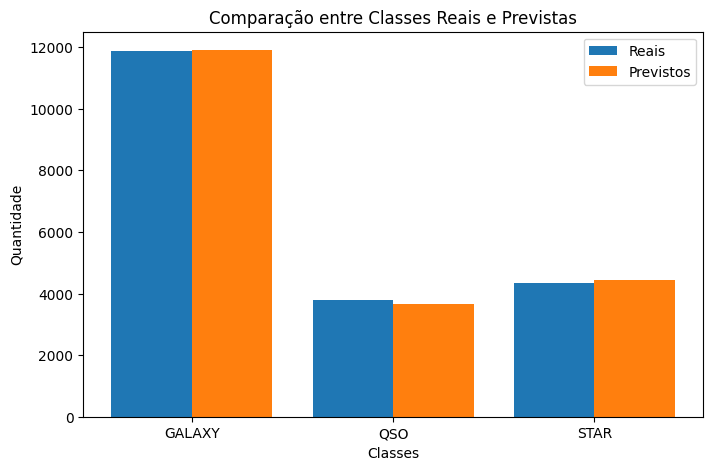

In [94]:
plt.figure(figsize=(8,5))
plt.bar(x - 0.2, [real_counts.get(label, 0) for label in labels], width=0.4, label='Reais')
plt.bar(x + 0.2, [pred_counts.get(label, 0) for label in labels], width=0.4, label='Previstos')

plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Comparação entre Classes Reais e Previstas')
plt.xticks(x, labels)
plt.legend()
plt.show()

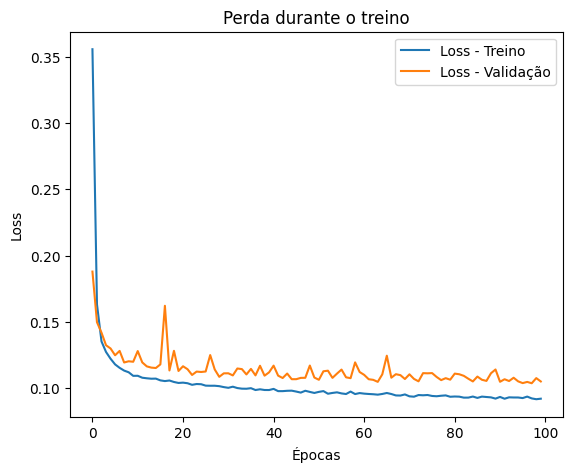

In [95]:
plt.figure(figsize=(14, 5))

# Gráfico de perda (Loss)
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Loss - Treino')
plt.plot(hist.history['val_loss'], label='Loss - Validação')
plt.title('Perda durante o treino')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()

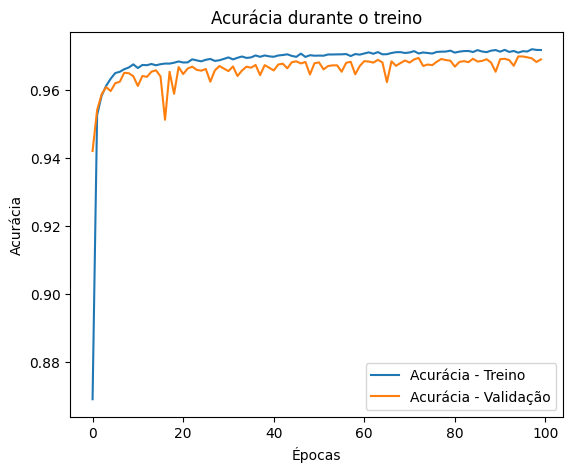

In [96]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Acurácia - Treino')
plt.plot(hist.history['val_accuracy'], label='Acurácia - Validação')
plt.title('Acurácia durante o treino')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

## Backpropagation

Epoch 10/100, Loss: 0.42120957374572754
Epoch 20/100, Loss: 0.3734036087989807
Epoch 30/100, Loss: 0.2441612333059311
Epoch 40/100, Loss: 0.21543779969215393
Epoch 50/100, Loss: 0.1975555717945099
Epoch 60/100, Loss: 0.18477478623390198
Epoch 70/100, Loss: 0.17552584409713745
Epoch 80/100, Loss: 0.16818873584270477
Epoch 90/100, Loss: 0.16197410225868225
Epoch 100/100, Loss: 0.15676777064800262


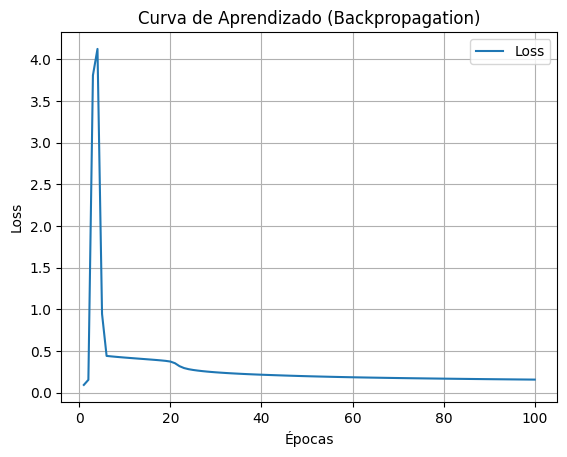

In [97]:
y_train = tf.convert_to_tensor(y_train)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(0.10)

epochs = 100

losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        logits = model(X_train)
        loss_value = loss_fn(y_train, logits)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    losses.append(loss_value.numpy())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss_value.numpy()}")

plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Curva de Aprendizado (Backpropagation)")
plt.grid(True)
plt.legend()
plt.show()

#### Salvando o modelo

In [98]:
model.save("modelo_4.keras")